# SOCCER WIN OR LOSS CLASSIFICATION ⚽ 

### 1.Problem Statement
Soccer aka Football is the most popular game in the world. It’s a religion of its own. If groups of 10 people can stop time and make people watch them in awe and reverence, it’s this beautiful game. Also, anybody can play soccer- all it needs is 4 poles, a ground and a ball. You can just get started with the play.

We live in ambiguity and always need some information to just make a decision. Decisions are made based on possible outcomes. Win/ Loss/ Pass / Fail etc.

The problem statement is a classic study for decision-making and understanding the odds stacked against a particular situation.

### 2. Dataset
Dataset taken from MachineHack competition - https://machinehack.com/hackathons/soccer_fever_weekend_hackathon_edition_2_the_last_hacker_standing/overview

Train
Dataset: 7443*21
Columns: 21
Target Column: Outcome


Test
Dataset: 4008*20
Columns: 20

### 3. Evaluation
The submission will be evaluated using the Log Loss metric. One can use sklearn.metric.log_loss to calculate the same.

### Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv',parse_dates=['date'])
data.head()

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,...,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,Outcome
0,2019,2019-01-03,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,1.75,0.84,...,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1.05,0.00,1
1,2019,2019-01-03,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,1.22,1.89,...,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0.00,3.26,0
2,2019,2019-01-03,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,2.58,0.62,...,28.8,3.0,0.0,0.49,0.45,1.05,0.75,3.15,0.00,1
3,2019,2019-01-03,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,1.10,1.79,...,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0.00,1.05,0
4,2019,2019-01-03,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,1.57,1.24,...,21.3,2.0,2.0,2.77,3.17,1.05,2.08,2.10,2.10,1


### Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7443 entries, 0 to 7442
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   season       7443 non-null   int64         
 1   date         7443 non-null   datetime64[ns]
 2   league_id    7443 non-null   int64         
 3   league       7443 non-null   object        
 4   Team 1       7443 non-null   object        
 5   Team2        7443 non-null   object        
 6   SPI1         7443 non-null   float64       
 7   SPI2         7443 non-null   float64       
 8   proj_score1  7443 non-null   float64       
 9   proj_score2  7443 non-null   float64       
 10  importance1  2527 non-null   float64       
 11  importance2  2527 non-null   float64       
 12  score1       2643 non-null   float64       
 13  score2       2643 non-null   float64       
 14  xg1          1715 non-null   float64       
 15  xg2          1715 non-null   float64       
 16  nsxg1 

In [4]:
data.head().T

,0,1,2,3,4
season,2019,2019,2019,2019,2019
date,2019-01-03 00:00:00,2019-01-03 00:00:00,2019-01-03 00:00:00,2019-01-03 00:00:00,2019-01-03 00:00:00
league_id,1979,1979,1979,1979,1979
league,Chinese Super League,Chinese Super League,Chinese Super League,Chinese Super League,Chinese Super League
Team 1,Shandong Luneng,Shanghai Greenland,Guangzhou Evergrande,Wuhan Zall,Chongqing Lifan
Team2,Guizhou Renhe,Shanghai SIPG,Tianjin Quanujian,Beijing Guoan,Guangzhou RF
SPI1,48.22,39.81,65.59,32.25,38.24
SPI2,37.83,60.08,39.99,54.82,40.45
proj_score1,1.75,1.22,2.58,1.1,1.57
proj_score2,0.84,1.89,0.62,1.79,1.24


In [5]:
data.isnull().sum()

season            0
date              0
league_id         0
league            0
Team 1            0
Team2             0
SPI1              0
SPI2              0
proj_score1       0
proj_score2       0
importance1    4916
importance2    4916
score1         4800
score2         4800
xg1            5728
xg2            5728
nsxg1          5728
nsxg2          5728
adj_score1     5728
adj_score2     5728
Outcome           0
dtype: int64

In [6]:
data.dtypes

season                  int64
date           datetime64[ns]
league_id               int64
league                 object
Team 1                 object
Team2                  object
SPI1                  float64
SPI2                  float64
proj_score1           float64
proj_score2           float64
importance1           float64
importance2           float64
score1                float64
score2                float64
xg1                   float64
xg2                   float64
nsxg1                 float64
nsxg2                 float64
adj_score1            float64
adj_score2            float64
Outcome                 int64
dtype: object

So we have some object dtype and missing values.

### Correlation Matrix

In [7]:
#getting correlation
corr = data.corr()

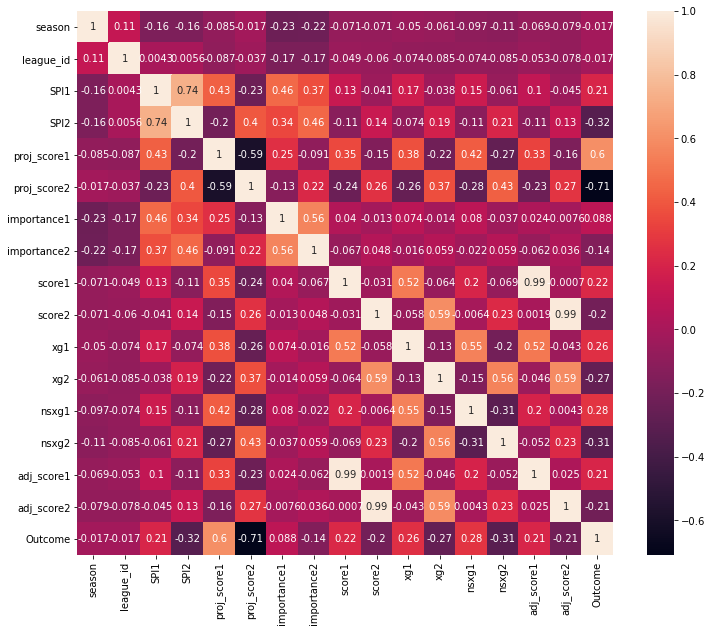

In [8]:
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,annot=True);

So we can see that features **score1, score2** is highly correlated to **adj_score1, adj_score2**

So we will drop this features

In [9]:
data.drop('adj_score1',axis=1,inplace=True)

In [10]:
data.drop('adj_score2',axis=1,inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7443 entries, 0 to 7442
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   season       7443 non-null   int64         
 1   date         7443 non-null   datetime64[ns]
 2   league_id    7443 non-null   int64         
 3   league       7443 non-null   object        
 4   Team 1       7443 non-null   object        
 5   Team2        7443 non-null   object        
 6   SPI1         7443 non-null   float64       
 7   SPI2         7443 non-null   float64       
 8   proj_score1  7443 non-null   float64       
 9   proj_score2  7443 non-null   float64       
 10  importance1  2527 non-null   float64       
 11  importance2  2527 non-null   float64       
 12  score1       2643 non-null   float64       
 13  score2       2643 non-null   float64       
 14  xg1          1715 non-null   float64       
 15  xg2          1715 non-null   float64       
 16  nsxg1 

In [12]:
data.head()

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,Outcome
0,2019,2019-01-03,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,1.75,0.84,45.9,22.1,1.0,0.0,1.39,0.26,2.05,0.54,1
1,2019,2019-01-03,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,1.22,1.89,25.6,63.4,0.0,4.0,0.57,2.76,0.80,1.50,0
2,2019,2019-01-03,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,2.58,0.62,77.1,28.8,3.0,0.0,0.49,0.45,1.05,0.75,1
3,2019,2019-01-03,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,1.10,1.79,35.8,58.9,0.0,1.0,1.12,0.97,1.51,0.94,0
4,2019,2019-01-03,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,1.57,1.24,26.2,21.3,2.0,2.0,2.77,3.17,1.05,2.08,1


In [13]:
#let's make copy of our data
data_tmp = data.copy()

In [14]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7443 entries, 0 to 7442
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   season       7443 non-null   int64         
 1   date         7443 non-null   datetime64[ns]
 2   league_id    7443 non-null   int64         
 3   league       7443 non-null   object        
 4   Team 1       7443 non-null   object        
 5   Team2        7443 non-null   object        
 6   SPI1         7443 non-null   float64       
 7   SPI2         7443 non-null   float64       
 8   proj_score1  7443 non-null   float64       
 9   proj_score2  7443 non-null   float64       
 10  importance1  2527 non-null   float64       
 11  importance2  2527 non-null   float64       
 12  score1       2643 non-null   float64       
 13  score2       2643 non-null   float64       
 14  xg1          1715 non-null   float64       
 15  xg2          1715 non-null   float64       
 16  nsxg1 

In [15]:
#let's first get our date in separate column
data_tmp['Date'] = data_tmp['date'].dt.day
data_tmp['Month'] = data_tmp['date'].dt.month
data_tmp['Year'] = data_tmp['date'].dt.year

In [16]:
#now let's drop our original date column
data_tmp.drop('date',axis=1,inplace=True)

In [17]:
data_tmp.head()

,season,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,importance1,...,score1,score2,xg1,xg2,nsxg1,nsxg2,Outcome,Date,Month,Year
0,2019,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.22,37.83,1.75,0.84,45.9,...,1.0,0.0,1.39,0.26,2.05,0.54,1,3,1,2019
1,2019,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.81,60.08,1.22,1.89,25.6,...,0.0,4.0,0.57,2.76,0.80,1.50,0,3,1,2019
2,2019,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.59,39.99,2.58,0.62,77.1,...,3.0,0.0,0.49,0.45,1.05,0.75,1,3,1,2019
3,2019,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.25,54.82,1.10,1.79,35.8,...,0.0,1.0,1.12,0.97,1.51,0.94,0,3,1,2019
4,2019,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.24,40.45,1.57,1.24,26.2,...,2.0,2.0,2.77,3.17,1.05,2.08,1,3,1,2019


Let's get our correlation again because maybe feature season and year maybe correlate 

<AxesSubplot:>

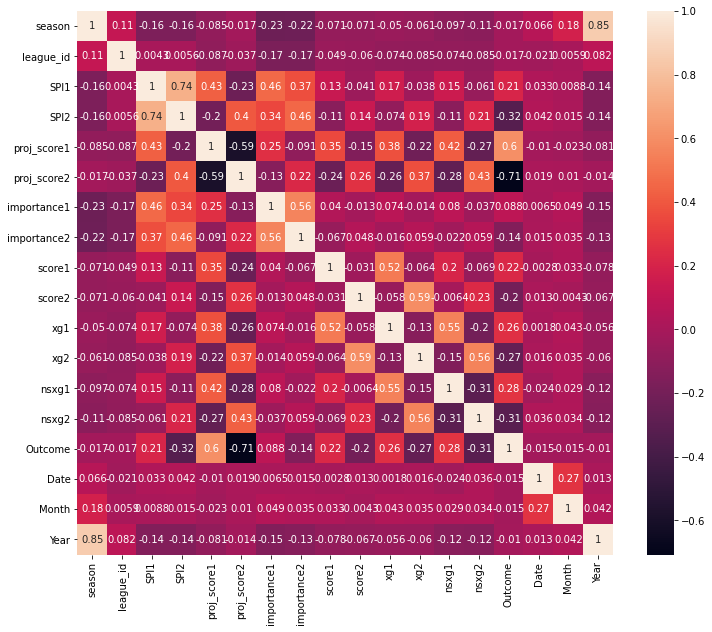

In [18]:
corr = data_tmp.corr()
fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr,annot=True)

Yes they are highly correlated so we will drop the year column 

In [19]:
data_tmp.drop('Year',axis=1,inplace=True)

In [20]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7443 entries, 0 to 7442
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       7443 non-null   int64  
 1   league_id    7443 non-null   int64  
 2   league       7443 non-null   object 
 3   Team 1       7443 non-null   object 
 4   Team2        7443 non-null   object 
 5   SPI1         7443 non-null   float64
 6   SPI2         7443 non-null   float64
 7   proj_score1  7443 non-null   float64
 8   proj_score2  7443 non-null   float64
 9   importance1  2527 non-null   float64
 10  importance2  2527 non-null   float64
 11  score1       2643 non-null   float64
 12  score2       2643 non-null   float64
 13  xg1          1715 non-null   float64
 14  xg2          1715 non-null   float64
 15  nsxg1        1715 non-null   float64
 16  nsxg2        1715 non-null   float64
 17  Outcome      7443 non-null   int64  
 18  Date         7443 non-null   int64  
 19  Month 

In [21]:
data_tmp['league'].unique()

array(['Chinese Super League', 'UEFA Champions League',
       'UEFA Europa League', 'AAL',
       'Mexican Primera Division Torneo Clausura', 'Japanese J League',
       'NWSL Challenge Cup', 'Swedish Allsvenskan', 'Major League Soccer',
       'United Soccer League', 'Norwegian Tippeligaen',
       "National Women's Soccer League", 'Brasileiro Série A',
       'Danish SAS-Ligaen', 'APD',
       'Mexican Primera Division Torneo Apertura', 'Russian Premier Liga',
       'German 2. Bundesliga', 'ATMB', 'BJL', 'French Ligue 2',
       'Swiss Raiffeisen Super League', 'Scottish Premiership',
       'English League Championship', 'French Ligue 1', 'Portuguese Liga',
       'English League Two', 'English League One', 'TTSL',
       'Dutch Eredivisie', 'Spanish Segunda Division',
       'German Bundesliga', 'BPL', 'Spanish Primera Division',
       'South African ABSA Premier League', 'Italy Serie B',
       'Italy Serie A', 'Greek Super League', "FA Women's Super League"],
      dtype=objec

In [22]:
#for object dtype we will drop this columns
data_tmp.drop('league',axis=1,inplace=True)
data_tmp.drop('Team 1',axis=1,inplace=True)
data_tmp.drop('Team2',axis=1,inplace=True)

In [23]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7443 entries, 0 to 7442
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       7443 non-null   int64  
 1   league_id    7443 non-null   int64  
 2   SPI1         7443 non-null   float64
 3   SPI2         7443 non-null   float64
 4   proj_score1  7443 non-null   float64
 5   proj_score2  7443 non-null   float64
 6   importance1  2527 non-null   float64
 7   importance2  2527 non-null   float64
 8   score1       2643 non-null   float64
 9   score2       2643 non-null   float64
 10  xg1          1715 non-null   float64
 11  xg2          1715 non-null   float64
 12  nsxg1        1715 non-null   float64
 13  nsxg2        1715 non-null   float64
 14  Outcome      7443 non-null   int64  
 15  Date         7443 non-null   int64  
 16  Month        7443 non-null   int64  
dtypes: float64(12), int64(5)
memory usage: 988.6 KB


For missing we will fill the missing values with median

### Filling Missing Values

In [24]:
for label, content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            

importance1
importance2
score1
score2
xg1
xg2
nsxg1
nsxg2


In [25]:
for label, content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data_tmp[label] = content.fillna(content.median())
            

In [26]:
data_tmp.isnull().sum()

season         0
league_id      0
SPI1           0
SPI2           0
proj_score1    0
proj_score2    0
importance1    0
importance2    0
score1         0
score2         0
xg1            0
xg2            0
nsxg1          0
nsxg2          0
Outcome        0
Date           0
Month          0
dtype: int64

Our data is finally ready for modeling

### Modeling

In [27]:
data_tmp.Outcome.unique()

array([1, 0], dtype=int64)

In [28]:
#getting our lib
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, log_loss

In [29]:
#getting our X and y and splittig training and validation set
np.random.seed(42)
X = data_tmp.drop('Outcome',axis=1)
y = data_tmp['Outcome']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

In [30]:
len(X_train), len(X_val)

(5954, 1489)

In [31]:
models = {
    'RandomForest':RandomForestClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'Bagging':BaggingClassifier(),
    'Ada':AdaBoostClassifier(),
    'CatBoost':CatBoostClassifier(silent=True),
    'XGB':XGBClassifier()
}

In [32]:
def fit(model,X_train,X_val,y_train,y_val):
    np.random.seed(42)
    for name,model in models.items():
        model.fit(X_train,y_train)
        pred = model.predict_proba(X_val)
        loss = log_loss(y_val,pred)
        print(f'Log Loss for {name} is {loss}.')
        

In [33]:
fit(models,X_train,X_val,y_train,y_val)


Log Loss for RandomForest is 0.06504650955734188.
Log Loss for GradientBoosting is 0.040738550882459375.
Log Loss for Bagging is 0.0492656454795246.
Log Loss for Ada is 0.48528317747610944.
Log Loss for CatBoost is 0.03275833822243544.


C:\Users\6\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Log Loss for XGB is 0.030031375859284462.


As we can XGB performs well than any other models, so well fit our baseline model with this default params

In [34]:
baseline_model = XGBClassifier()
baseline_model.fit(X_train,y_train)
pred = baseline_model.predict(X_val)
pred_probs = baseline_model.predict_proba(X_val)
baseline_loss = log_loss(y_val,pred_probs)
baseline_loss

[16:56:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\6\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.030031375859284462

#### Confusion matrix

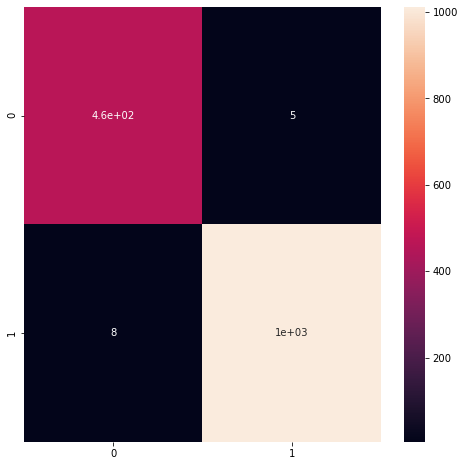

In [35]:

conf_matrix = confusion_matrix(y_val,pred)
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_matrix,annot=True);

#### Classification Report

In [36]:
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       469
           1       1.00      0.99      0.99      1020

    accuracy                           0.99      1489
   macro avg       0.99      0.99      0.99      1489
weighted avg       0.99      0.99      0.99      1489



### Hypertuning our model

#### By hand

In [37]:
baseline_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
params = {
    # Parameters that we are going to tune.
    'max_depth':[1,2,3,6],
    'min_child_weight': [1,2,3],
    'learning_rate':[0.01,0.1,0.3,1],
    'subsample':[1,2,3],
    'colsample_bytree': [1,2,3],
    'n_estimator':[100,300,500,900,1000]
}

In [41]:
%%time
np.random.seed(42)

xgb_rs = RandomizedSearchCV(XGBClassifier(),params,cv=5,n_iter=10,verbose=True,n_jobs=-1)
xgb_rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished
C:\Users\6\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 2.21 s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [44]:
xgb_rs.best_params_

{'subsample': 1,
 'n_estimator': 100,
 'min_child_weight': 2,
 'max_depth': 6,
 'learning_rate': 0.1,
 'colsample_bytree': 1}

In [42]:
proba_rs = xgb_rs.predict_proba(X_val)

In [43]:
loss_rs = log_loss(y_val,proba_rs)
loss_rs

0.026277960002399035

Woah that's pretty score than compare to baseline model

### GridSearchCV

In [51]:
params_grid = {
    # Parameters that we are going to tune.
    'max_depth':[5,6,7],
    'min_child_weight': [1,2,3],
    'learning_rate':[0.01,0.1,0.3],
    'subsample':[1,2,3],
    'colsample_bytree': [1,2,3],
    'n_estimators':[100,900,1000]
}

In [52]:
xgb_grid = GridSearchCV(XGBClassifier(),params_grid,cv=5,verbose=True,n_jobs=-1)
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1253 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3634 out of 3645 | elapsed:  3.2min remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed:  3.2min finished
C:\Users\6\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [53]:
xgb_grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 2,
 'n_estimators': 900,
 'subsample': 1}

In [54]:
proba_grid = xgb_grid.predict_proba(X_val)
loss_grid = log_loss(y_val,proba_grid)
loss_grid

0.027193377432777343

Our grid search cv parameter works well

Let's fit our model with this parameters

In [55]:
hp_model = XGBClassifier(n_estimators=100,
                         colsample_bytree=1,
                         learning_rate=0.1,
                         max_depth=6,
                         min_child_weight=2,
                         subsample=1,
                         random_state=42)
hp_model.fit(X_train,y_train)
hp_pred = hp_model.predict(X_val)
hp_pred_proba = hp_model.predict_proba(X_val)
hp_loss = log_loss(y_val,hp_pred_proba)
hp_loss

[17:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\6\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.026277960002399035

#### Let's try to hypertuned our n_estimators by hand

In [61]:
import warnings
warnings.filterwarnings('ignore')
n_estimators = [10,50,100,200,300,400,500,600,700,800,900,1000]
for i in n_estimators:
    model = XGBClassifier(n_estimators=i,
                          colsample_bytree=1,
                          learning_rate=0.1,
                          max_depth=6,
                          min_child_weight=2,
                          subsample=1,
                          random_state=42,silent=True)
    model.fit(X_train,y_train)
    proba_exp = model.predict_proba(X_val)
    loss_exp = log_loss(y_val,proba_exp)
    print(f'number of estimators is {i} and loss is {loss_exp}')
    

number of estimators is 10 and loss is 0.221453462794293
number of estimators is 50 and loss is 0.02881843988333946
number of estimators is 100 and loss is 0.026277960002399035
number of estimators is 200 and loss is 0.028507319678537944
number of estimators is 300 and loss is 0.030340785450463457
number of estimators is 400 and loss is 0.031037321870448366
number of estimators is 500 and loss is 0.031483236709321724
number of estimators is 600 and loss is 0.03184839364628481
number of estimators is 700 and loss is 0.032546795920186014
number of estimators is 800 and loss is 0.032498973576291106
number of estimators is 900 and loss is 0.03308940808103957
number of estimators is 1000 and loss is 0.03339772831465062


As we can see **n_estimators=100** is only giving best results


So we will now predict on our test data

### Getting test data

In [68]:
test_data = pd.read_csv('test.csv',parse_dates=['date'])
test_data.head()

,season,date,league_id,league,Team 1,Team2,SPI1,SPI2,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2021,2021-12-14,2411,BPL,Arsenal,West Ham United,79.65,74.06,1.67,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,2021-12-14,2411,BPL,Brighton and Hove Albion,Wolverhampton,74.19,71.14,1.35,0.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,2021-12-14,2411,BPL,Norwich City,Aston Villa,60.67,71.45,1.18,1.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,2021-12-14,2411,BPL,Leicester City,Tottenham Hotspur,76.88,79.06,1.52,1.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,2021-12-14,2411,BPL,Brentford,Manchester United,63.53,85.58,0.95,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   season       4008 non-null   int64         
 1   date         4008 non-null   datetime64[ns]
 2   league_id    4008 non-null   int64         
 3   league       4008 non-null   object        
 4   Team 1       4008 non-null   object        
 5   Team2        4008 non-null   object        
 6   SPI1         4008 non-null   float64       
 7   SPI2         4008 non-null   float64       
 8   proj_score1  4008 non-null   float64       
 9   proj_score2  4008 non-null   float64       
 10  importance1  0 non-null      float64       
 11  importance2  0 non-null      float64       
 12  score1       0 non-null      float64       
 13  score2       0 non-null      float64       
 14  xg1          0 non-null      float64       
 15  xg2          0 non-null      float64       
 16  nsxg1 

In [70]:
test_data.isnull().sum()

season            0
date              0
league_id         0
league            0
Team 1            0
Team2             0
SPI1              0
SPI2              0
proj_score1       0
proj_score2       0
importance1    4008
importance2    4008
score1         4008
score2         4008
xg1            4008
xg2            4008
nsxg1          4008
nsxg2          4008
adj_score1     4008
adj_score2     4008
dtype: int64

Our test data have some object dtypes and missing values so let's preprocess our test data

In [71]:
def preprocess(data_tmp):
    data_tmp.drop('adj_score1',axis=1,inplace=True) 
    data_tmp.drop('adj_score2',axis=1,inplace=True)
    data_tmp['Date'] = data_tmp['date'].dt.day
    data_tmp['Month'] = data_tmp['date'].dt.month
    data_tmp['Year'] = data_tmp['date'].dt.year
    data_tmp.drop('date',axis=1,inplace=True)
    data_tmp.drop('Year',axis=1,inplace=True)
    data_tmp.drop('league',axis=1,inplace=True)
    data_tmp.drop('Team 1',axis=1,inplace=True)
    data_tmp.drop('Team2',axis=1,inplace=True)
    for label, content in data_tmp.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                data_tmp[label] = content.fillna(content.median())

In [72]:
preprocess(test_data)

In [73]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       4008 non-null   int64  
 1   league_id    4008 non-null   int64  
 2   SPI1         4008 non-null   float64
 3   SPI2         4008 non-null   float64
 4   proj_score1  4008 non-null   float64
 5   proj_score2  4008 non-null   float64
 6   importance1  0 non-null      float64
 7   importance2  0 non-null      float64
 8   score1       0 non-null      float64
 9   score2       0 non-null      float64
 10  xg1          0 non-null      float64
 11  xg2          0 non-null      float64
 12  nsxg1        0 non-null      float64
 13  nsxg2        0 non-null      float64
 14  Date         4008 non-null   int64  
 15  Month        4008 non-null   int64  
dtypes: float64(12), int64(4)
memory usage: 501.1 KB


In [74]:
test_data.isnull().sum()

season            0
league_id         0
SPI1              0
SPI2              0
proj_score1       0
proj_score2       0
importance1    4008
importance2    4008
score1         4008
score2         4008
xg1            4008
xg2            4008
nsxg1          4008
nsxg2          4008
Date              0
Month             0
dtype: int64

In [75]:
submission = pd.read_csv('submission.csv' )
submission['Outcome'] = hp_model.predict(test_data)
submission.to_csv('submission_1.csv',index=False)
submission

,Outcome
0,1
1,1
2,0
3,1
4,0
...,...
4003,1
4004,0
4005,1
4006,1
